In [52]:
%matplotlib inline
import torch as t
from torch.nn import Linear,Module,MSELoss
from torch.optim import SGD
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
torch.__version__


ModuleNotFoundError: No module named 'pandas'

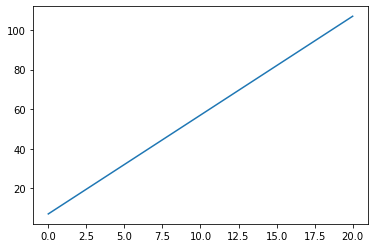

In [54]:
x = np.linspace(0,20,500)
y = 5*x + 7
plt.plot(x,y)

In [55]:
x = np.random.rand(256)
noise = np.random.randn(256)/4
y = x * 5 + 7 + noise
df.pd.DataFrame()
df['x'] = x
df['y'] = y

In [46]:
nested_lists = [[1, 2], [[3, 4], [5, 6], [[7, 8], [9, 10], [[11, [12, 13]]]]]]
flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
flatten(nested_lists)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

trucktruckhorse  dog


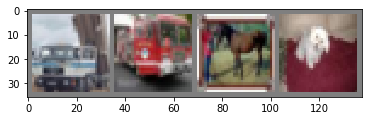

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(trainloader)
images,labels = dataiter.next()

imshow(tv.utils.make_grid(images))
print(''.join('%5s' %classes[labels[j]] for j in range(4)))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Sequential()
        self.conv1.add_module("conv1",nn.Conv2d(3,6,5))
        self.conv1.add_module("relu1",nn.ReLU())
        self.conv1.add_module("pool1",nn.MaxPool2d(2,2))
        
        self.conv2 = nn.Sequential()
        self.conv2.add_module("conv2",nn.Conv2d(6,16,5))
        self.conv2.add_module("relu2",nn.ReLU())
        self.conv2.add_module("pool2",nn.MaxPool2d(2,2))
        
        self.fc = nn.Sequential()
        self.fc.add_module("fc1",nn.Linear(16*5*5,120))
        self.conv1.add_module("relu2",nn.ReLU())
        self.fc.add_module("fc2",nn.Linear(120,84))
        self.conv1.add_module("relu3",nn.ReLU())
        self.fc.add_module("fc3",nn.Linear(84,10))
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1,16*5*5)
        x = self.fc(x)
        return x

    
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
print(device)
net = Net()
net.to(device)
print(net)
        
        

cuda:0
Net(
  (conv1): Sequential(
    (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (relu1): ReLU()
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (relu2): ReLU()
    (relu3): ReLU()
  )
  (conv2): Sequential(
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (relu2): ReLU()
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (fc1): Linear(in_features=400, out_features=120, bias=True)
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (fc3): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [6]:
import torch.optim as optim
crit = nn.CrossEntropyLoss()
opti = optim.SGD(net.parameters(),lr = 0.01,momentum=0.9)

In [7]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opti.zero_grad()
        
        out = net(inputs)
        loss = crit(out,labels)
        loss.backward()
        opti.step()
        
        running_loss += loss.item()
        if i %2000 == 1999:
            print('[%d,%5d] loss: %.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
print('finnished')

[1, 2000] loss: 2.099
[1, 4000] loss: 2.009
[1, 6000] loss: 1.999
[1, 8000] loss: 1.977
[1,10000] loss: 1.979
[1,12000] loss: 2.021
[2, 2000] loss: 2.020
[2, 4000] loss: 1.976
[2, 6000] loss: 1.970
[2, 8000] loss: 1.968
[2,10000] loss: 2.019
[2,12000] loss: 1.955
finnished


In [ ]:
dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(tv.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)
_, predicted = t.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [8]:
device = t.device("")
net.to(device)

RuntimeError: Device string must not be empty

In [9]:
t.cuda.device_count()

1

In [ ]:
# import torch.optim as optim
# print(net.conv1.bias)
# # create your optimizer
# optimizer = optim.SGD(net.parameters(), lr=1)

# # in your training loop:
# optimizer.zero_grad()   # zero the gradient buffers
# output = net(input)
# loss = crit(output, tar)
# loss.backward()
# print(net.conv1.bias.grad)
# optimizer.step()    # Does the update
# print(net.conv1.bias)
# import torch.optim as optim
# print(net.conv1.bias)
# # create your optimizer
# optimizer = optim.SGD(net.parameters(), lr=1)

# # in your training loop:
# optimizer.zero_grad()   # zero the gradient buffers
# output = net(input)
# loss = crit(output, tar)
# loss.backward()
# print(net.conv1.bias.grad)
# optimizer.step()    # Does the update
# print(net.conv1.bias)# import torch.optim as optim
# print(net.conv1.bias)
# # create your optimizer
# optimizer = optim.SGD(net.parameters(), lr=1)

# # in your training loop:
# optimizer.zero_grad()   # zero the gradient buffers
# output = net(input)
# loss = crit(output, tar)
# loss.backward()
# print(net.conv1.bias.grad)
# optimizer.step()    # Does the update
# print(net.conv1.bias)